# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
os.chdir("A:\DATA\Imartics")
df=pd.read_csv("data.csv")
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


# Data Profile Report

In [3]:
dfp=ProfileReport(df,title="TRAIN")
dfp.to_notebook_iframe()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.shape

(2227, 3)

# Missing Values Treatment

In [5]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [6]:
NaN = df.isnull()
NaN_rows = NaN.any(axis=1)
rows_NaN = df[NaN_rows]

In [7]:
rows_NaN

,x1,x2,y
36,NaN,116.138522,1
44,-99.627522,NaN,1
98,NaN,36.905402,1
268,NaN,-116.385719,1
1084,NaN,34.714328,0
1092,55.162258,NaN,0
1318,NaN,53.182191,0
1430,-74.126054,NaN,0


Using the Drop funcation for Missing Value because values are less

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

# Visualization Data

## Pairplot

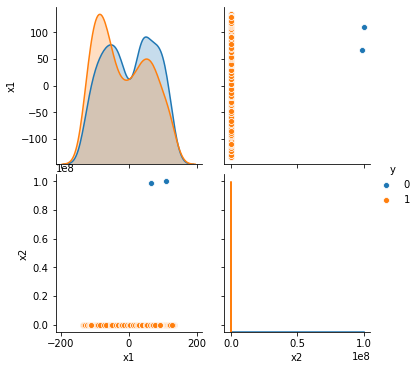

In [10]:
sns.pairplot(df,hue='y')

## Using boxplot form visualization data and showing Outlier 

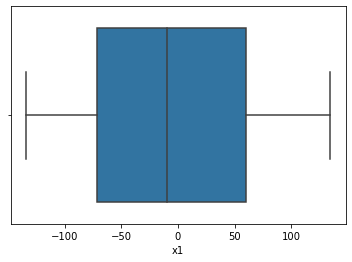

In [11]:
sns.boxplot(x='x1', data=df)

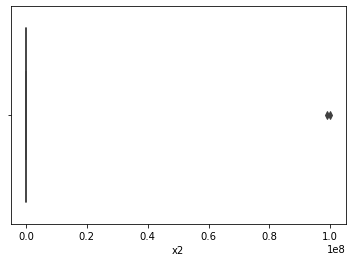

In [12]:
sns.boxplot(x='x2', data=df)

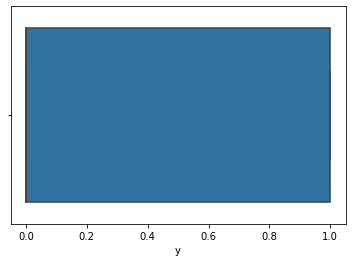

In [13]:
sns.boxplot(x='y', data=df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 149.3 KB


### Scatter Plot

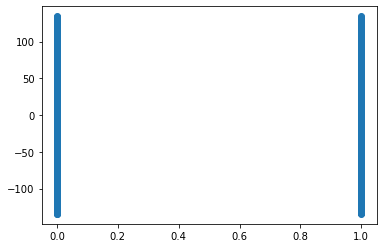

In [15]:
plt.scatter(df['y'], df['x1'])
plt.show()

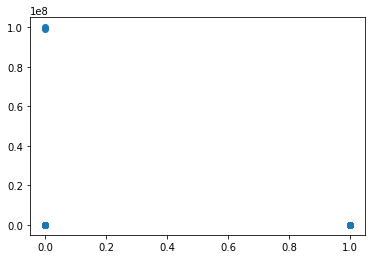

In [16]:
plt.scatter(df['y'], df['x2'])
plt.show()

## Distribution Plot

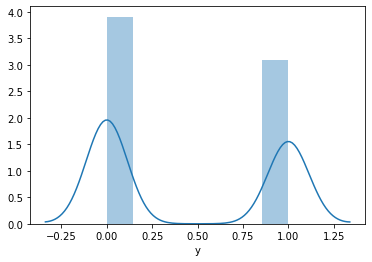

In [17]:
sns.distplot(df['y'])

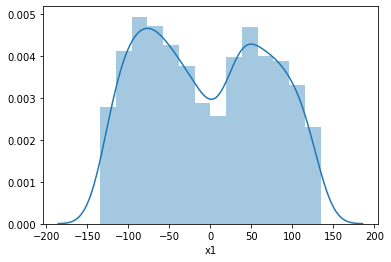

In [18]:
sns.distplot(df['x1'])

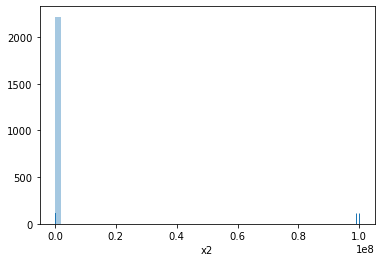

In [19]:
sns.distplot(df['x2'],kde=False, rug=True)

# Train & Test Split

In [20]:
x = df.drop(["y"],axis  = 1)
y = df["y"]

## StandardScaler

In [21]:
from sklearn.preprocessing import StandardScaler
standardized_df = StandardScaler().fit_transform(df)
print(standardized_df.shape)

(2219, 3)


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [23]:
x_train.shape,y_train.shape,y_test.shape,x_test.shape

((1553, 2), (1553,), (666,), (666, 2))

## LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [25]:
y_pred = classifier.predict(x_test)

In [26]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.536036036036036

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_fscore_support,classification_report

## Using Funcation For all Models

In [28]:
def Model_cv(X1,Y1,model):
    
    np.random.seed(0)
    X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.3,random_state=100)
    sc=StandardScaler()
    
    X_train=sc.fit_transform(X_train)
    X_test=sc.fit_transform(X_test)
     
    model.fit(X_train,Y_train)
    #Test data prediction
    y_pred=model.predict(X_test)
    
    # Train data Predcition
    y_train_pred=model.predict(X_train)
    
    
    print(cross_val_score(model,X_train,Y_train,cv=7,scoring='accuracy').mean())
    
    training_Score = accuracy_score(Y_train,y_train_pred.round())
    testing_score = accuracy_score(Y_test,y_pred.round())
    
    print('Metrics for the model',model)
    
    print("Trainig Score_",  training_Score)
    print("Testing Score_",testing_score)

    print(confusion_matrix(Y_train,y_train_pred))
    
    print(confusion_matrix(Y_test,y_pred))
    
    print('Classification report on training',classification_report(Y_train,y_train_pred))
    
    print('Classification report on testing',classification_report(Y_test,y_pred))
    
    print('Precison Score on Training',precision_score(Y_train,y_train_pred.round(),average=None))
 
    print('Precison Score on Testing',precision_score(Y_test,y_pred.round(),average=None))
    
Model_cv(x,y,classifier)

0.5930484459896225
Metrics for the model LogisticRegression()
Trainig Score_ 0.5949774629748873
Testing Score_ 0.36786786786786785
[[716 156]
 [473 208]]
[[241 125]
 [296   4]]
Classification report on training               precision    recall  f1-score   support

           0       0.60      0.82      0.69       872
           1       0.57      0.31      0.40       681

    accuracy                           0.59      1553
   macro avg       0.59      0.56      0.55      1553
weighted avg       0.59      0.59      0.56      1553

Classification report on testing               precision    recall  f1-score   support

           0       0.45      0.66      0.53       366
           1       0.03      0.01      0.02       300

    accuracy                           0.37       666
   macro avg       0.24      0.34      0.28       666
weighted avg       0.26      0.37      0.30       666

Precison Score on Training [0.60218671 0.57142857]
Precison Score on Testing [0.44878957 0.03100775]


## KNeighborsClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
Model_cv(x,y,knn)

0.5582819406348818
Metrics for the model KNeighborsClassifier()
Trainig Score_ 0.7102382485511912
Testing Score_ 0.7792792792792793
[[688 184]
 [266 415]]
[[319  47]
 [100 200]]
Classification report on training               precision    recall  f1-score   support

           0       0.72      0.79      0.75       872
           1       0.69      0.61      0.65       681

    accuracy                           0.71      1553
   macro avg       0.71      0.70      0.70      1553
weighted avg       0.71      0.71      0.71      1553

Classification report on testing               precision    recall  f1-score   support

           0       0.76      0.87      0.81       366
           1       0.81      0.67      0.73       300

    accuracy                           0.78       666
   macro avg       0.79      0.77      0.77       666
weighted avg       0.78      0.78      0.78       666

Precison Score on Training [0.721174   0.69282137]
Precison Score on Testing [0.76133652 0.8097166 ]


## Support Vector Machines¶

In [30]:
from sklearn.svm import SVC
svc= SVC()
Model_cv(x,y,svc)

0.5943354472766237
Metrics for the model SVC()
Trainig Score_ 0.5936896329684481
Testing Score_ 0.5705705705705706
[[721 151]
 [480 201]]
[[355  11]
 [275  25]]
Classification report on training               precision    recall  f1-score   support

           0       0.60      0.83      0.70       872
           1       0.57      0.30      0.39       681

    accuracy                           0.59      1553
   macro avg       0.59      0.56      0.54      1553
weighted avg       0.59      0.59      0.56      1553

Classification report on testing               precision    recall  f1-score   support

           0       0.56      0.97      0.71       366
           1       0.69      0.08      0.15       300

    accuracy                           0.57       666
   macro avg       0.63      0.53      0.43       666
weighted avg       0.62      0.57      0.46       666

Precison Score on Training [0.60033306 0.57102273]
Precison Score on Testing [0.56349206 0.69444444]


## Support Vector Machines(Linear)

In [31]:
from sklearn import svm
svm_classifier=svm.SVC(kernel='linear')
Model_cv(x,y,svm_classifier)

0.5614936203171496
Metrics for the model SVC(kernel='linear')
Trainig Score_ 0.5614938828074694
Testing Score_ 0.5495495495495496
[[872   0]
 [681   0]]
[[366   0]
 [300   0]]
Classification report on training               precision    recall  f1-score   support

           0       0.56      1.00      0.72       872
           1       0.00      0.00      0.00       681

    accuracy                           0.56      1553
   macro avg       0.28      0.50      0.36      1553
weighted avg       0.32      0.56      0.40      1553

Classification report on testing               precision    recall  f1-score   support

           0       0.55      1.00      0.71       366
           1       0.00      0.00      0.00       300

    accuracy                           0.55       666
   macro avg       0.27      0.50      0.35       666
weighted avg       0.30      0.55      0.39       666

Precison Score on Training [0.56149388 0.        ]
Precison Score on Testing [0.54954955 0.        ]


## Support Vector Machines(RBF)

In [32]:
svm_classifier=svm.SVC(kernel='rbf')
Model_cv(x,y,svm_classifier)

0.5943354472766237
Metrics for the model SVC()
Trainig Score_ 0.5936896329684481
Testing Score_ 0.5705705705705706
[[721 151]
 [480 201]]
[[355  11]
 [275  25]]
Classification report on training               precision    recall  f1-score   support

           0       0.60      0.83      0.70       872
           1       0.57      0.30      0.39       681

    accuracy                           0.59      1553
   macro avg       0.59      0.56      0.54      1553
weighted avg       0.59      0.59      0.56      1553

Classification report on testing               precision    recall  f1-score   support

           0       0.56      0.97      0.71       366
           1       0.69      0.08      0.15       300

    accuracy                           0.57       666
   macro avg       0.63      0.53      0.43       666
weighted avg       0.62      0.57      0.46       666

Precison Score on Training [0.60033306 0.57102273]
Precison Score on Testing [0.56349206 0.69444444]


# DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
Model_cv(x,y,dt)

0.9433311786252963
Metrics for the model DecisionTreeClassifier()
Trainig Score_ 1.0
Testing Score_ 0.9429429429429429
[[872   0]
 [  0 681]]
[[355  11]
 [ 27 273]]
Classification report on training               precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       681

    accuracy                           1.00      1553
   macro avg       1.00      1.00      1.00      1553
weighted avg       1.00      1.00      1.00      1553

Classification report on testing               precision    recall  f1-score   support

           0       0.93      0.97      0.95       366
           1       0.96      0.91      0.93       300

    accuracy                           0.94       666
   macro avg       0.95      0.94      0.94       666
weighted avg       0.94      0.94      0.94       666

Precison Score on Training [1. 1.]
Precison Score on Testing [0.92931937 0.96126761]


# Hyperparameter Tuning(GridSearchCV, RandomizedSearchCV)

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
  
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3) 
  
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.559, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.563, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.563, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.561, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.561, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.559, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.563, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.563, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.561, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.561, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    9.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [35]:
GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [36]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [37]:
svm=svm.SVC(C=0.1,kernel='rbf',gamma=1)

In [38]:
Model_cv(x_train,y_train,svm)

0.9364941510102801
Metrics for the model SVC(C=0.1, gamma=1)
Trainig Score_ 0.9438822447102115
Testing Score_ 0.5128755364806867
[[599   7]
 [ 54 427]]
[[ 99 167]
 [ 60 140]]
Classification report on training               precision    recall  f1-score   support

           0       0.92      0.99      0.95       606
           1       0.98      0.89      0.93       481

    accuracy                           0.94      1087
   macro avg       0.95      0.94      0.94      1087
weighted avg       0.95      0.94      0.94      1087

Classification report on testing               precision    recall  f1-score   support

           0       0.62      0.37      0.47       266
           1       0.46      0.70      0.55       200

    accuracy                           0.51       466
   macro avg       0.54      0.54      0.51       466
weighted avg       0.55      0.51      0.50       466

Precison Score on Training [0.91730475 0.98387097]
Precison Score on Testing [0.62264151 0.45602606]


# KNeighborsClassifier(GridSearchCV)

In [39]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring='accuracy'
)
clf.fit(x_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(x_test, y_test))
print(clf.score(x_train, y_train))

Best parameters set found on train set:
{'n_neighbors': 5, 'p': 3}
KNeighborsClassifier(p=3)

0.9519519519519519
0.9626529298132647


# KNeighborsClassifier(RandomizedSearchCV)

In [40]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]

clf = RandomizedSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring='accuracy'
)
clf.fit(x_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(x_test, y_test))
print(clf.score(x_train, y_train))

Best parameters set found on train set:
{'p': 3, 'n_neighbors': 5}
KNeighborsClassifier(p=3)

0.9519519519519519
0.9626529298132647


# DecisionTreeClassifier(GridSearchCV)

In [41]:
tuned_parameters = [{'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}]

clf = GridSearchCV(
    DecisionTreeClassifier(), tuned_parameters, scoring='accuracy'
)
clf.fit(x_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(x_test, y_test))
print(clf.score(x_train, y_train))

Best parameters set found on train set:
{'criterion': 'gini', 'max_depth': 150}
DecisionTreeClassifier(max_depth=150)

0.9234234234234234
1.0


# DecisionTreeClassifier(RandomizedSearchCV)

In [42]:
tuned_parameters = [{'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}]

clf = RandomizedSearchCV(
    DecisionTreeClassifier(), tuned_parameters, scoring='accuracy'
)
clf.fit(x_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(x_test, y_test))
print(clf.score(x_train, y_train))

Best parameters set found on train set:
{'max_depth': 120, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=120)

0.9279279279279279
1.0


### KNN is the better model 
##### * Because without using Hyperparameret tuning we got 0.7102382485511912 accuracy
#####  * And with using Hyperparameret tuning we got 0.9519519519519519 accuracy